# Analyse de données Airbnb Paris


In [50]:
grabRemote <- function(url) {
    #fct to extract compress file from url
    temp <- tempfile()
    download.file(url, temp)
    aap.file <- read.csv(gzfile(temp), as.is = TRUE)
    unlink(temp)
    return(aap.file)
}
  
listings <- grabRemote("http://data.insideairbnb.com/france/ile-de-france/paris/2021-04-10/data/listings.csv.gz")


In [51]:
calendar <- grabRemote("http://data.insideairbnb.com/france/ile-de-france/paris/2021-04-10/data/calendar.csv.gz")

[1] "On peut voir que les quartiers avec le moins de biens disponibles sont plutôt\ndes quartiers prisés"


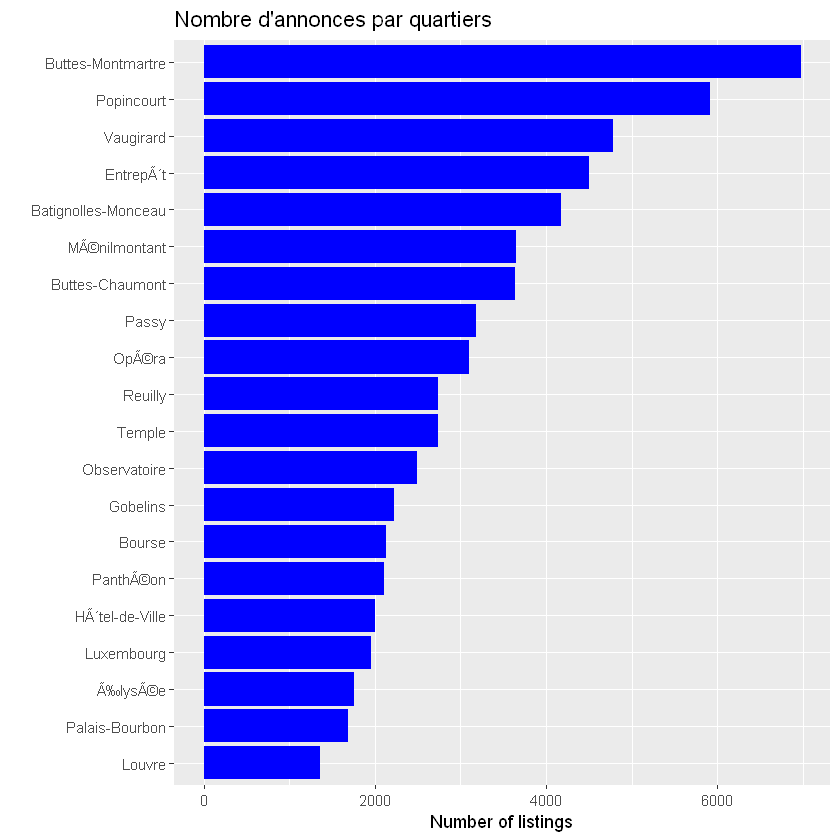

In [52]:
library("dplyr")
library("ggplot2")
library("stringr")

# Regardons le nombre d'annonces par quartier
listings_by_neighbourhood <- count(listings, neighbourhood_cleansed) %>%
  ggplot() + 
  geom_bar(aes(y=reorder(neighbourhood_cleansed, n), x=n), 
                      stat="identity", 
                      fill='blue')

print(listings_by_neighbourhood + labs(x = "Number of listings", y="",
                   title = "Nombre d'annonces par quartiers"))

print("On peut voir que les quartiers avec le moins de biens disponibles sont plutôt
des quartiers prisés")

n
63090


[1] "Sur les 63000 biens du notre jeu de données, la moitié sont des biens pour 2 personnes.\nIl y en a également environ 1/4 pour 4 personnes"


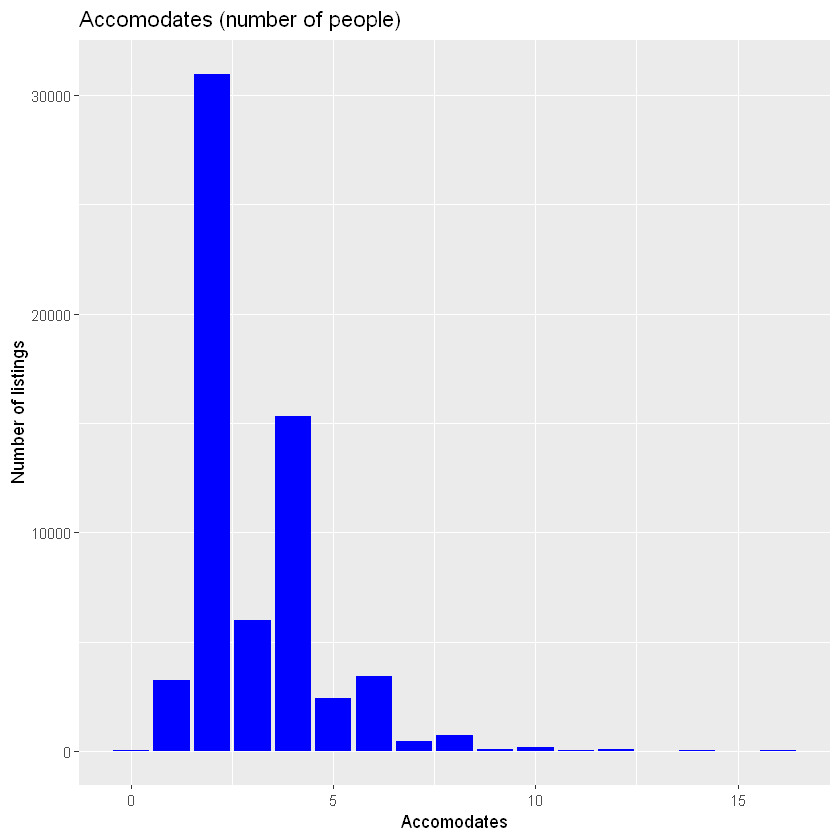

In [53]:
# Nombres d'annonces pour un nombre de personnes disponibles
accomodates_graph <- count(listings, accommodates) %>%
  ggplot() + 
  geom_bar(aes(x=accommodates, y=n), 
                      stat="identity", 
                      fill='blue')

print(accomodates_graph + labs(x = "Accomodates", 
                               y="Number of listings",
                               title = "Accomodates (number of people)"))
count(listings) # == 63090
print("Sur les 63000 biens du notre jeu de données, la moitié sont des biens pour 2 personnes.
Il y en a également environ 1/4 pour 4 personnes")

In [54]:
 #Création d'une fonction popur garder les valeurs numériques
 #Pour le 3ème graphique

price_parser <- function(s) {
 
  new_str <- ""
  str <- strsplit(s, "")[[1]]
  check <- c(as.character(0:9), ".")
  for (char in str) {
    if (char %in% check) {
      new_str <- paste(new_str, char, sep="")
    }
  }
  return (as.numeric(new_str))
}

In [55]:
test <- gsub("[$]", "", listings$price)

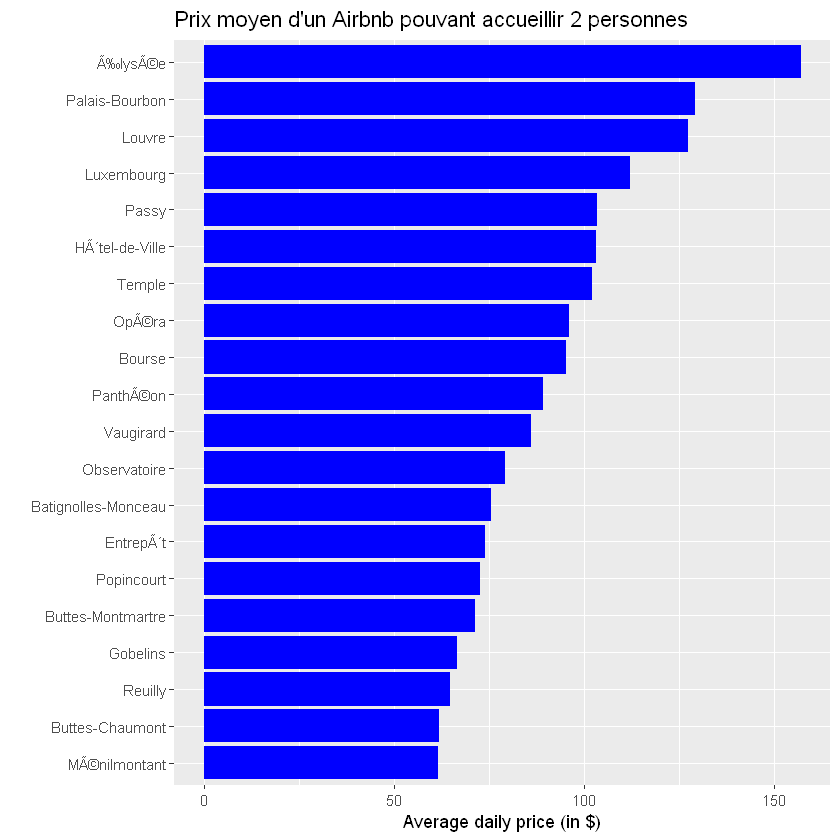

In [56]:
# Transformation des prix en int
listings$price <- sapply(listings$price, price_parser)

# on sélectionne les valeurs dont on  a besoin
for_two <- select(listings, neighbourhood_cleansed, price, accommodates) %>%
  filter(accommodates==2)

price_for_two <- for_two %>% group_by(neighbourhood_cleansed) %>% 
  summarise(avg = mean(price)) %>%
  ggplot() + geom_bar(aes(x=avg, 
                          y=reorder(neighbourhood_cleansed, avg)), 
                      stat="identity", fill = 'blue')

print(price_for_two + labs(x = "Average daily price (in $)", y="",
                               title = "Prix moyen d'un Airbnb pouvant accueillir 2 personnes"))


In [ ]:
print("Le classement du prix moyen pour des biens pour 2 personnes n'est pas étonnant :
On retrouve en tête les quartiers prisés et des quartiers plus populaire à la fin
On remarque notemment que la moyenne du prix pour le quartier le plus cher représente
presque 3 fois le prix des quartiers les moins chers
")

sprintf("La moyenne est %f", mean(for_two$price)) # la moyenne des prix pour 2 personnes est de 84$


[1] "Le classement du prix moyen pour des biens pour 2 personnes n'est pas étonnant :\nOn retrouve en tête les quartiers prisés et des quartiers plus populaire à la fin\nOn remarque notemment que la moyenne du prix pour le quartier le plus cher représente\npresque 3 fois le prix des quartiers les moins cher\n"


[1] "La moyenne est 83.823877"

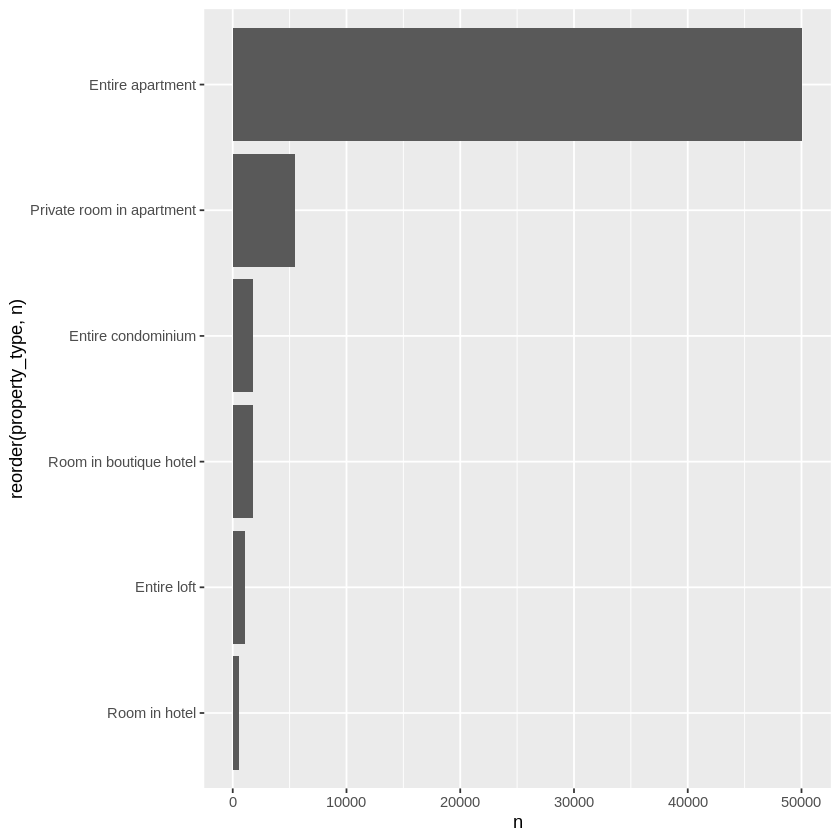

In [59]:
#Graphique montrant le nombre d'hébergement par type 

property <- listings %>%
  count(property_type) %>%
  filter(n > 500)

ggplot(property) + geom_bar(aes(y=reorder(property_type, n), x=n), stat="identity")

In [85]:
# On garde les mois et les années 
calendar <- mutate(calendar, month = format(as.Date(date), "%y-%m"))

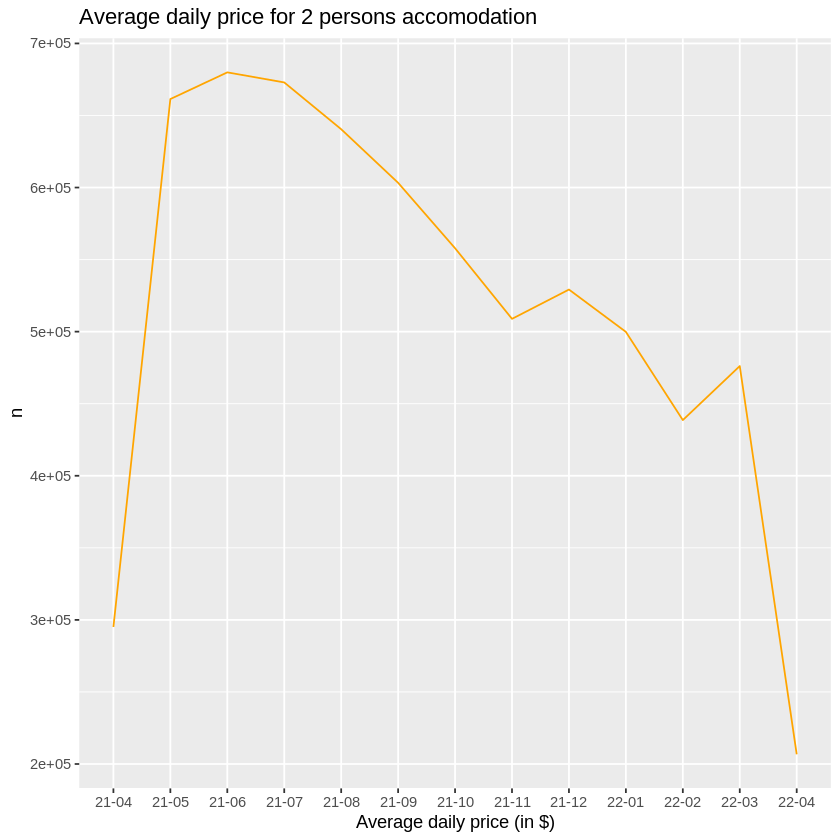

In [86]:
graph_date <- calendar %>%
  filter(available=="t") %>% 
  count(month) %>%
  ggplot() + geom_line(aes(month, n), group=1, colour="orange")

print(graph_date + labs(x = "Average daily price (in $)", 
     title = "Average daily price for 2 persons accomodation"))

In [ ]:
"On voit que les prix sont le plus élevés entre mai et aout, ce qui semble logique"

In [99]:
#On sélectionne les variables dont on a besoin

acco <- select(listings, id, accommodates, price) %>% filter(accommodates==2)
calendar <- select(calendar, listing_id, month)

#Jointure des deux df
joined <- inner_join(acco, calendar, by=c('id' = 'listing_id'))

joined <- filter(joined, accommodates==2)

In [100]:
#Création d'un nouveau graphique 
by_date_for_2 <- joined %>%
  group_by(month) %>%
  summarise(mean = mean(price)) %>%
  ggplot() + geom_line(aes(month, mean), group=1, colour="orange")

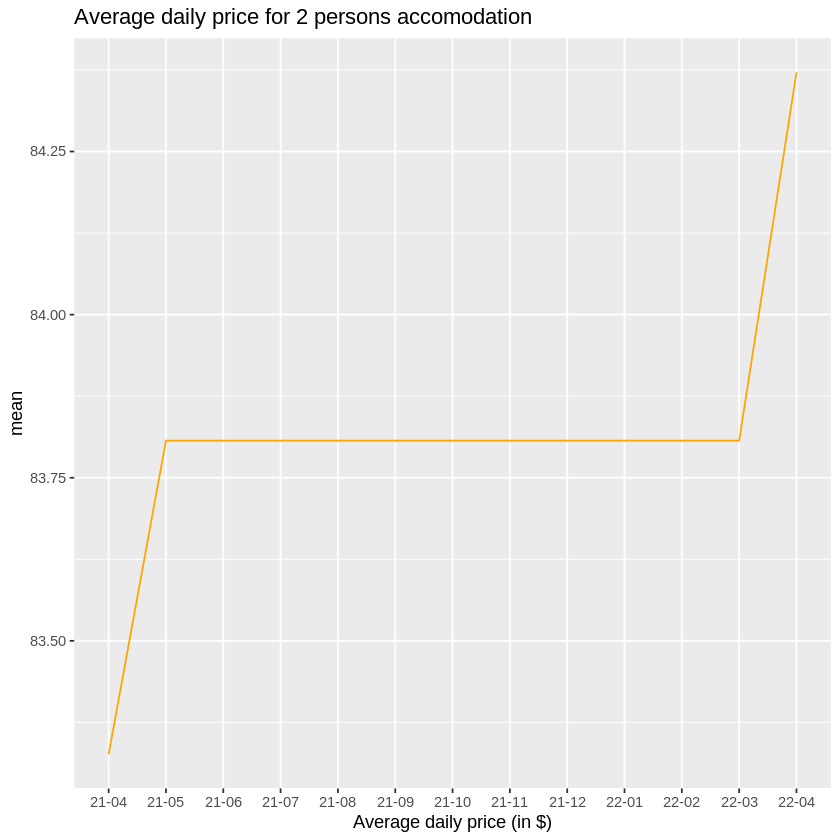

In [101]:
print(by_date_for_2 + labs(x = "Average daily price (in $)", 
     title = "Average daily price for 2 persons accomodation"))

In [111]:
count(joined, month)
"La courbe pour le prix moyen pour un bien pour 2 est constante (à environ 84$) sauf pour le premier et le dernier mois,
cela est surment du au nombre de biens disponibles pour ces mois inférieur aux autres"

month,n
<chr>,<int>
21-04,542841
21-05,959853
21-06,928890
21-07,959853
21-08,959853
21-09,928890
21-10,959853
21-11,928890
21-12,959853


[1] "La courbe pour le prix moyen pour un bien pour 2 est constante (à environ 84$) sauf pour le premier et le dernier mois,\ncela est surment du au nombre de biens disponibles pour ces mois inférieur aux autres"